In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler


In [2]:
def read_csv_space(path, file):
    return pd.read_csv(os.path.join(path, file), encoding='', sep='\s+', index_col=False, engine='python') 

def read_csv_comma(path, file):
    return pd.read_csv(os.path.join(path, file), encoding='', sep=',', engine='python') 

df = read_csv_comma("/kaggle/input/housing", "housing.csv")
print(df.isnull().values.any()) ## check if there are missing inputs
print(df.isnull().sum()) ## count number of missing for each column
df.dropna(inplace=True) ## drop observations with missing values
print("final number of observations:", len(df))

df['ocean_dummy']=(df['ocean_proximity'] == 'NEAR BAY').astype(int) # creat a dummy indication nearby ocean
feature_list = ['median_income', 'housing_median_age', 'total_rooms', 'total_bedrooms',
                'population', 'ocean_dummy', 'households', 'longitude', 'latitude']
target = 'median_house_value' 
y = df[target]/1000000
X = df[feature_list]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


True
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
final number of observations: 20433


#### MinMaxScalar is to scale data as follows:
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0)) 

X_scaled = X_std * (max - min) + min

In [3]:
# use minMax scaler
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

## Building a DNN Using Keras Framework in Tensorlow

In [4]:
# build the model!
model = Sequential()
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu')) # (features,)
model.add(Dropout(0.5)) # specify a percentage between 0 and 0.5, or larger
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5)) # specify a percentage between 0 and 0.5, or larger
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.5)) # specify a percentage between 0 and 0.5, or larger
model.add(Dense(1, activation='linear')) # output node
model.summary() # see what your model looks like

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              10000     
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_2 (Dense)             (None, 250)               125250    
                                                                 
 dropout_2 (Dropout)         (None, 250)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 2

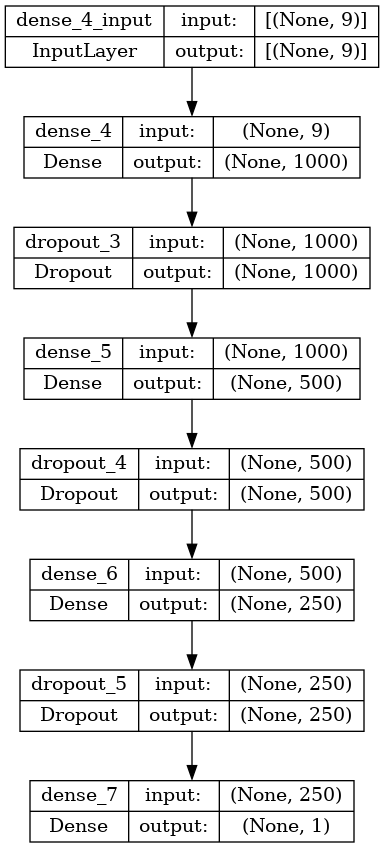

In [11]:
from tensorflow.keras.utils import plot_model

# Save the model diagram to a file
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

In [5]:
# compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

## model.compile Explanation

The model.compile method is used to configure the learning process of a Keras model.

- optimizer='rmsprop':
  
This specifies the optimizer to be RMSprop, which is an adaptive learning rate method especially well-suited for problems with non-stationary targets or noisy gradients.

- loss='mse':
  
This sets the loss function to Mean Squared Error (MSE), which is commonly used in regression problems.

- metrics=['mae']:
  
This specifies Mean Absolute Error (MAE) as a metric to monitor during training. It gives a more interpretable error measure in the same units as the output.


#### Optimizers Provided by Keras

Keras offers several built-in optimizers:

- SGD (Stochastic Gradient Descent):
  
The basic gradient descent algorithm with optional momentum and learning rate scheduling.

- RMSprop:
  
An extension of AdaGrad that works better in practice for non-stationary objectives (e.g., in recurrent networks or noisy problems).

- Adam (Adaptive Moment Estimation):
  
Combines the benefits of AdaGrad and RMSprop. Generally considered a great default choice.

- Adadelta:
  
An extension of AdaGrad that seeks to reduce its aggressive, monotonically decreasing learning rate.

- Adagrad:
  
Adjusts the learning rate adaptively for each parameter, making larger updates for infrequent parameters and smaller updates for frequent ones.

- Adamax:
  
A variant of Adam based on the infinity norm; can be more stable in some situations.

- Nadam (Nesterov-accelerated Adaptive Moment Estimation):
  
Combines Adam with Nesterov momentum, potentially improving convergence.

- FTRL (Follow The Regularized Leader):
  
Useful for large-scale, sparse problems in classification, regression, and ranking tasks.

- SGDW and AdamW:
  
Variants of SGD and Adam that separate weight decay (L2 regularization) from the learning rate. This helps regularization behave more predictably.

In [6]:
# early stopping callback
es = EarlyStopping(monitor='val_loss', # validation loss
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

# fit the model!
# attach it to a new variable called 'history' in case
# to look at the learning curves
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    callbacks=[es],
                    epochs=50,
                    batch_size=128,
                    verbose=1)

Epoch 1/50
128/128 [==============================] - 4s 18ms/step - loss: 0.0098 - mae: 0.0730 - val_loss: 0.0068 - val_mae: 0.0563
Epoch 2/50
128/128 [==============================] - 2s 18ms/step - loss: 0.0063 - mae: 0.0580 - val_loss: 0.0049 - val_mae: 0.0501
Epoch 3/50
128/128 [==============================] - 2s 16ms/step - loss: 0.0055 - mae: 0.0543 - val_loss: 0.0054 - val_mae: 0.0506
Epoch 4/50
128/128 [==============================] - 2s 16ms/step - loss: 0.0052 - mae: 0.0521 - val_loss: 0.0044 - val_mae: 0.0470
Epoch 5/50
128/128 [==============================] - 2s 16ms/step - loss: 0.0049 - mae: 0.0508 - val_loss: 0.0043 - val_mae: 0.0460
Epoch 6/50
128/128 [==============================] - 2s 17ms/step - loss: 0.0047 - mae: 0.0493 - val_loss: 0.0040 - val_mae: 0.0457
Epoch 7/50
128/128 [==============================] - 3s 20ms/step - loss: 0.0046 - mae: 0.0492 - val_loss: 0.0040 - val_mae: 0.0459
Epoch 8/50
128/128 [==============================] - 2s 16ms/step - 

### EarlyStopping Callback Explanation

The EarlyStopping callback in Keras is used to stop training early when the model’s performance stops improving, helping to prevent overfitting. The parameters used:

- monitor:
  
Specifies which metric to monitor during training.
In this case: 'val_loss', meaning the validation loss (performance on the test/validation set) is monitored.

- mode:
  
Defines whether the monitored metric should be minimized or maximized.
Since we want to minimize the validation loss, it is set to 'min'.

- patience:
  
The number of epochs to wait for improvement before stopping.
Here, if the validation loss does not improve for 50 consecutive epochs, training will stop.

- restore_best_weights:
  
If set to True, the model will restore the weights from the epoch with the best validation loss once training stops.
This ensures the final model uses the best version seen during training.

- Summary:The EarlyStopping callback helps prevent overfitting by monitoring the validation loss and stopping training when it stops improving, while also restoring the best weights seen during training.
  
### model.fit() Parameters

- validation_data=(X_test, y_test):
  
This provides a validation dataset.
After each training epoch, the model evaluates its performance on this data to monitor generalization.

- callbacks=[es]:
  
Passes the previously defined EarlyStopping callback (es) to the training process, so the model will stop early if validation loss doesn’t improve.

- epochs=20:
  
Sets the maximum number of training epochs. One epoch means the model sees the entire training set once.

- batch_size=200:
  
Number of training samples processed before the model updates its weights.
Affects training speed and memory usage.

- verbose=1:
  
Controls how much information is shown during training.
1 means a progress bar with loss and metric values for each epoch.

In [14]:
pred = model.predict(X_test)
from sklearn.metrics import r2_score
print('R2 Value:', r2_score(y_test, pred)) # test

128/128 [==============================] - 0s 2ms/step
R2 Value: 0.7344417255053941


## Busing a DNN Using PyTorch 

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class MyModel(nn.Module):
    def __init__(self, input_features):
        super(MyModel, self).__init__()
        # Define the layers of the model
        self.fc1 = nn.Linear(input_features, 1000)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(1000, 500)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(500, 250)
        self.dropout3 = nn.Dropout(0.5)
        self.fc4 = nn.Linear(250, 1)

    def forward(self, x):
        # Define the forward pass
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = F.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.fc4(x)  # Output layer with linear activation
        return x


This code defines a custom neural network model called MyModel, which inherits from nn.Module.

- By inheriting from nn.Module, the model can take advantage of the tools PyTorch provides for building and training neural networks.

- __init__ Method

  
The __init__ method defines the layers of the neural network.
The model includes four fully connected (dense or linear) layers (nn.Linear), each followed by a dropout layer (nn.Dropout).

Dropout layers randomly zero out a fraction of the input units during training,
which helps prevent overfitting by adding regularization.

- forward Method
  
The forward method defines the forward pass of the model — how the input data x flows through the layers defined in __init__.

Each linear layer (fc1, fc2, fc3, fc4) is followed by a ReLU activation function (F.relu), except for the final output layer.

The final layer’s output is returned as the model's prediction.

#### PyTorch Tensor Format

Tensors are the core data structure in PyTorch for representing multi-dimensional data. They are similar to NumPy arrays but come with additional capabilities and advantages:

1. Multi-dimensional Arrays
PyTorch tensors are multi-dimensional arrays that can have any number of dimensions:

A 1D tensor is like a vector,

A 2D tensor is like a matrix,

Higher-dimensional tensors can represent more complex data structures (e.g., images, batches of sequences, etc.).

2. Data Types
   
Tensors can hold different types of data, such as:

Integers (torch.int),

Floating-point numbers (torch.float),

Boolean values (torch.bool),and more.

3. Automatic Differentiation
   
Tensors in PyTorch support automatic differentiation, a core feature for deep learning:

PyTorch can track operations performed on tensors and automatically construct a computational graph.

This enables automatic gradient computation for training neural networks efficiently.

4. GPU Acceleration
   
Tensors can be moved to and processed on a GPU, significantly speeding up computation:

You can transfer tensors to the GPU using .to(device) or .cuda() methods,

This allows deep learning models to take advantage of GPU’s parallel computing power.

5. Broadcasting Mechanism
   
Like NumPy, PyTorch supports broadcasting, which allows operations on tensors of different shapes by automatically expanding their dimensions when needed.

6. Rich Set of Operations
   
PyTorch offers a comprehensive set of tensor operations, including:

Mathematical computations,

Linear algebra,

Tensor concatenation and slicing, and many more.

In [16]:
X_train_torch = torch.from_numpy(X_train).float()  # Convert and set to float
X_test_torch = torch.from_numpy(X_test).float()  # Convert and set to float
y_train_torch = torch.from_numpy(y_train.to_numpy().reshape(-1, 1)).float()
y_test_torch = torch.from_numpy(y_test.to_numpy().reshape(-1, 1)).float()
input_features = X_train_torch.shape[1]
model = MyModel(input_features)

- The purpose of this code is to convert training and testing data into PyTorch tensors and create a model that matches the number of input features.

- torch.from_numpy

  
This function is used to convert a NumPy array (X_train) into a PyTorch tensor.
Then, the .float() method is called to convert it into a floating-point tensor, which is the required format for inputs to neural networks.

- .to_numpy() → .reshape(-1, 1) → torch.from_numpy()
  
First, .to_numpy() converts a Pandas Series (e.g. y_train) to a NumPy array.

Then, .reshape(-1, 1) reshapes it into a 2D array with one column (i.e., a column vector).

Finally, torch.from_numpy() converts it to a PyTorch tensor, and .float() ensures it's in the correct floating-point format.


#### EarlyStopping in PyTorch

In PyTorch, early stopping is not provided out-of-the-box like in Keras, so you typically need to implement it manually.

Below is a basic explanation of how to implement early stopping in PyTorch:

In [17]:
class EarlyStopping:
    def __init__(self, patience=5, min_delta=0):
        self.patience = patience 
        self.min_delta = min_delta  
        self.counter = 0 
        self.best_score = None  
        self.early_stop = False  

    def step(self, val_loss):
        if self.best_score is None:
            self.best_score = val_loss
        elif val_loss > self.best_score - self.min_delta:
            self.counter += 1
            print(f'early stopping counter: {self.counter}/{self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = val_loss
            self.counter = 0
        return self.early_stop


In [18]:
# Early stopping
es = EarlyStopping(patience=5, min_delta=0.0001)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    optimizer.zero_grad()  # Clear gradients for the next train
    output = model(X_train_torch)  # Forward pass model.forward(X_train_torch)
    loss = criterion(output, y_train_torch)  # Compute the loss
    loss.backward()  # Backward pass
    optimizer.step()  # Update weights

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    
    model.eval()
    with torch.no_grad():
        outputs = model(X_test_torch)
        val_loss = criterion(outputs, y_test_torch)
        
    # Check for early stopping
    if es.step(val_loss):
        print(f'Early stopping at epoch {epoch+1}')
        break

# Evaluation
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    predictions = model(X_test_torch)  # Assuming X_test is your test data tensor
    test_loss = criterion(predictions, y_test_torch)  # Assuming y_test is your target test data tensor
    print(f'Test Loss: {test_loss.item():.4f}')

early stopping counter: 1/5
early stopping counter: 1/5
Epoch [10/20], Loss: 0.0083
early stopping counter: 1/5
early stopping counter: 1/5
early stopping counter: 1/5
early stopping counter: 1/5
Epoch [20/20], Loss: 0.0063
early stopping counter: 2/5
Test Loss: 0.0059


"Early stopping counter: 1/5" and "Early stopping counter: 2/5" indicate the current value of the early stopping counter during training.

For example, "1/5" means the counter is at 1, with a maximum patience of 5.
When the counter reaches the maximum patience (5 in this case), early stopping will be triggered.